In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statistics as st
from sklearn.linear_model import LinearRegression
from datetime import datetime 

In [34]:
data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(data)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,74,84,94,110,110,120,170,174,237
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,230,264,302,367,409,454,511,584,716,847
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,0,0,0,0,0,0,...,0,0,0,0,0,4,4,5,5,6
252,NaN,MS Zaandam,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,9
253,NaN,Botswana,-22.328500,24.684900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4,4
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
139,NaN,Japan,36.0,138.0,2,2,2,2,4,4,...,1128,1193,1307,1387,1468,1693,1866,1866,1953,2178


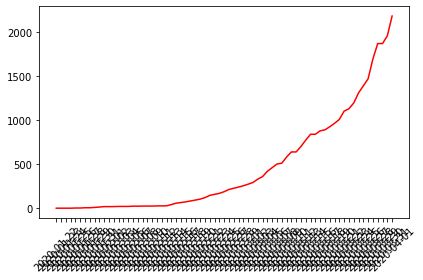

In [35]:
japan = data[data["Country/Region"] == "Japan"]
display(japan)
time_ser = japan.iloc[:,4:]
#display(list(time_ser.iloc[0]))
fig, ax = plt.subplots()
fig.canvas.draw()
col = time_ser.iloc[0]
dates=list(time_ser)
date_object = datetime.strptime(dates[0], '%m/%d/%y')
x_values = [datetime.strptime(str(d),"%m/%d/%y").date() for d in dates]

plt.plot(dates, col, c = "red")

ax.set_xticklabels(x_values, rotation=45)
plt.tight_layout()

plt.show()


In [32]:
da = pd.read_csv("csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv")
au = da[da["Country_Region"] == "Australia"]
display(au)
T_R=sum(list(da["Recovered"]))
T_D=sum(list(da["Deaths"]))
T_C=sum(list(da["Confirmed"]))
AU_R=sum(list(au["Recovered"]))
AU_D=sum(list(au["Deaths"]))
AU_C=sum(list(au["Confirmed"]))
print("Confirmed in AU: ",sum(list(au["Confirmed"])))
print("Recovered in AU: ",sum(list(au["Recovered"])))
print("Deaths in AU:    ",sum(list(au["Deaths"])))
print("Total Confirmed: ",sum(list(da["Confirmed"])))
print("Total Recovered: ",sum(list(da["Recovered"])))
print("Total Deaths:    ",sum(list(da["Deaths"])))
print("Total Active:    ",sum(list(da["Active"])))
print("Recover Rate:    ",np.round(T_R*100/T_C,3),"%")
print("Deaths Rate:     ",np.round(T_D*100/T_C,3),"%")
print("AU Recover Rate: ",np.round(AU_R*100/AU_C,3),"%")
print("AU Deaths Rate:  ",np.round(AU_D*100/AU_C,3),"%")        

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2227,NaN,NaN,Australian Capital Territory,Australia,2020-04-01 22:04:58,-35.4735,149.0124,84,1,8,75,"Australian Capital Territory, Australia"
2272,NaN,NaN,New South Wales,Australia,2020-04-01 22:04:58,-33.8688,151.2093,2182,9,4,2169,"New South Wales, Australia"
2276,NaN,NaN,Northern Territory,Australia,2020-04-01 22:04:58,-12.4634,130.8456,19,0,0,19,"Northern Territory, Australia"
2284,NaN,NaN,Queensland,Australia,2020-04-01 22:04:58,-27.4698,153.0251,781,2,8,771,"Queensland, Australia"
2296,NaN,NaN,South Australia,Australia,2020-04-01 22:04:58,-34.9285,138.6007,367,0,6,361,"South Australia, Australia"
2298,NaN,NaN,Tasmania,Australia,2020-04-01 22:04:58,-42.8821,147.3272,69,2,5,62,"Tasmania, Australia"
2302,NaN,NaN,Victoria,Australia,2020-04-01 22:04:58,-37.8136,144.9631,968,4,343,621,"Victoria, Australia"
2304,NaN,NaN,Western Australia,Australia,2020-04-01 22:04:58,-31.9505,115.8605,392,2,48,342,"Western Australia, Australia"


Confirmed in AU:  4862
Recovered in AU:  422
Deaths in AU:     20
Total Confirmed:  932605
Total Recovered:  193177
Total Deaths:     46809
Total Active:     484351
Recover Rate:     20.714 %
Deaths Rate:      5.019 %
AU Recover Rate:  8.68 %
AU Deaths Rate:   0.411 %
